# Applying Principal Component Analysis

## Loading data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Load data
df_iris = pd.read_csv('Iris.csv')


In [3]:

df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Correlation Heatmap

C:\Users\lehar\AppData\Local\Temp\ipykernel_21888\1030051467.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_iris.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


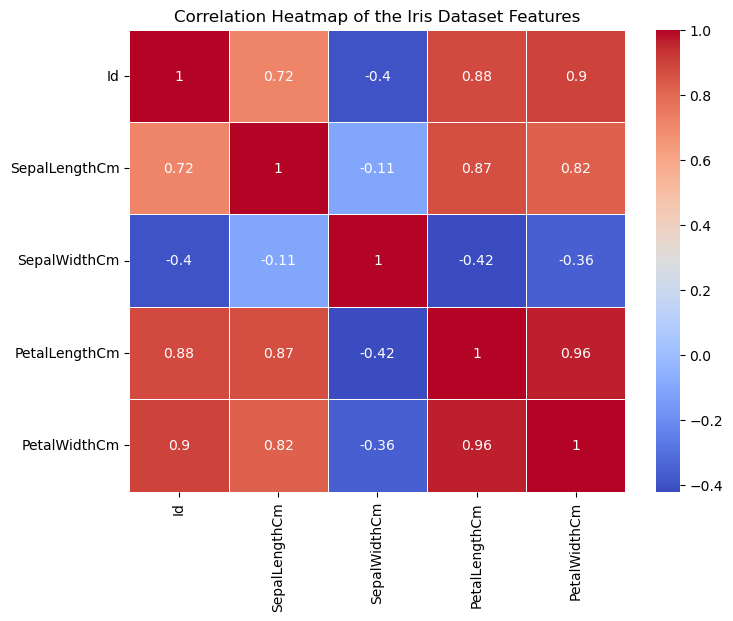

In [4]:
# Plotting the correlation heatmap 
plt.figure(figsize=(8, 6))
sns.heatmap(df_iris.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of the Iris Dataset Features")
plt.show()


## Apply PCA


The following plot shows that most of the variables in this dataset are highly positively or negatively correlated with at least one other variable. Examples of correlated variables are the variables measuring the death rate of men, women and infants, and the variables measuring use of cell phones and the internet. This makes the dataset a good candidate for PCA. 


In [5]:
# Drop the species column for scaling and PCA
X = df_iris.drop(columns=['Species'])

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['species'] = df_iris['Species']
pca_df.head()


,PC1,PC2,PC3,species
0,-2.816339,0.506051,-0.369151,Iris-setosa
1,-2.645527,-0.651799,-0.514571,Iris-setosa
2,-2.879481,-0.321036,-0.208181,Iris-setosa
3,-2.810934,-0.577363,-0.192961,Iris-setosa
4,-2.879884,0.670468,-0.165235,Iris-setosa


## Visualization

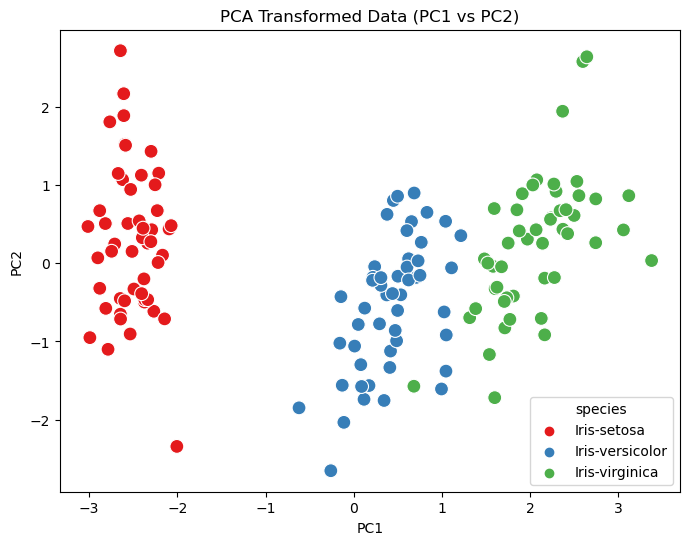

In [6]:
# Plotting PC1 and PC2
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df, palette='Set1', s=100)
plt.title("PCA Transformed Data (PC1 vs PC2)")
plt.show()


The Principle components are uncorrelated, showing that PCA has summarised all related information in a smaller number of variables. 

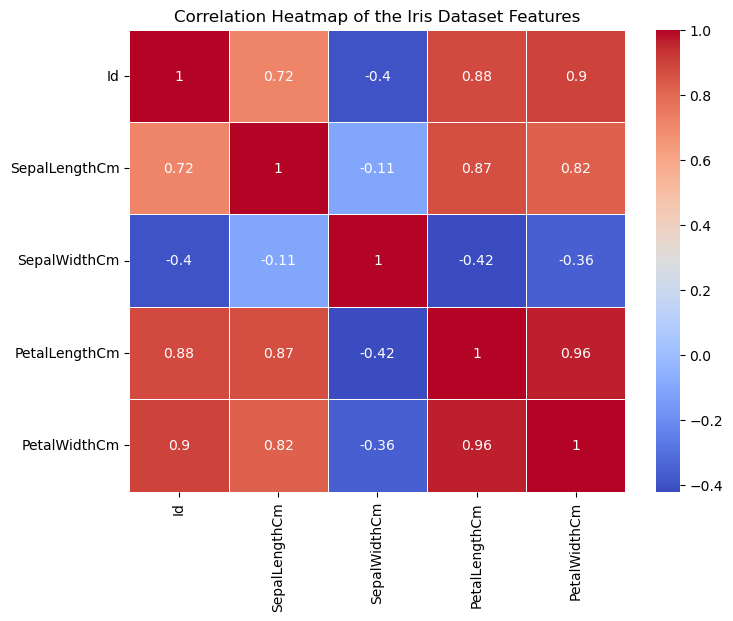

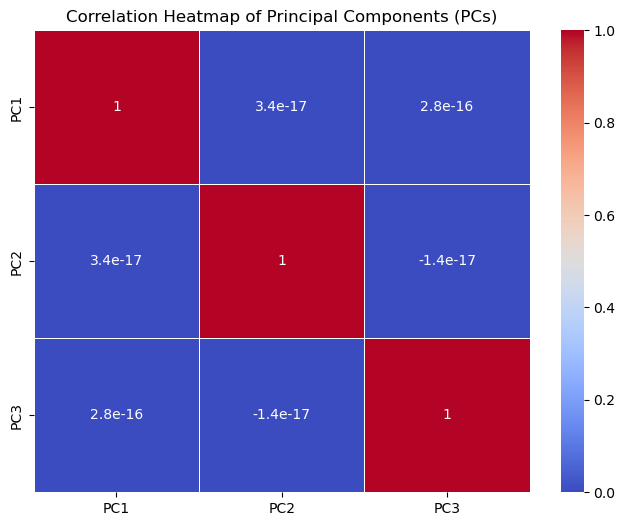

In [8]:
# Correlation Heatmap before PCA
plt.figure(figsize=(8, 6))
data = df_iris.drop(columns=['Species'])
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of the Iris Dataset Features")
plt.show()

# Define X as the DataFrame without the 'Species' column 
X = df_iris.drop(columns=['Species'])

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['species'] = df_iris['Species']

# Correlation Heatmap after PCA
plt.figure(figsize=(8, 6))
sns.heatmap(pca_df.drop(columns=['species']).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Principal Components (PCs)")
plt.show()

### Interpreting PCA

Correlation Heatmap: The heatmap likely shows strong positive or negative correlations between features like petal length and petal width, meaning some of the features provide redundant information.

PCA Plot: PCA transformation condenses the data into three principal components (PC1, PC2, PC3). The scatter plot of PC1 and PC2 reveals that most of the variance is captured by the first two components, likely removing the redundancy observed in the original features (such as correlations between petal length and width).

Petal Length and Petal Width: These features were highly correlated in the original data, suggesting that PCA likely combined their information into a single principal component (PC1 or PC2), removing redundancy.
Sepal Features: The relationship between sepal length and width may have contributed less to the variance and may have been down-weighted by PCA.